## 컬러 영상을 채널별로 구분해 디스플레이하기

In [2]:
import cv2 as cv
import sys
img=cv.imread('soccer.jpg')

if img is None:
  sys.exit('파일을 찾을 수 없습니다.')

cv.imshow('original_RGB',img)
cv.imshow('Upper left half',img[0:img.shape[0]//2,0:img.shape[1]//2,:])
cv.imshow('Center half',img[img.shape[0]//4:3*img.shape[0]//4,img.shape[1]//4:3*img.shape[1]//4,:])

cv.imshow('R channel',img[:,:,2])
cv.imshow('G channel',img[:,:,1])
cv.imshow('B channel',img[:,:,0])

cv.waitKey()
cv.destroyAllWindows()

## 모폴로지 연산 적용하기

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img=cv.imread('pngwing.com.png', cv.IMREAD_UNCHANGED)

t,bin_img=cv.threshold(img[:,:,3],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(bin_img,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

b-bin_img[bin_img.shape[0]//2:bin_img.shape[0],0:bin_img.shape[0]//2+1]
plt.imshow(b,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

se=np.uint8([[0,0,1,0,0],
             [0,1,1,1,0],
             [1,1,1,1,1],
             [0,1,1,1,0],
             [0,0,1,0,0]])

b_dilation=cv.dilate(b,se,iterations=1)
plt.imshow(b_dilation,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

b_erosion=cv.erode(b,se,iterations=1)
plt.imshow(b_erosion,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

b_closing=cv.erode(cv.dilate(b,se,iterations=1),se,iterations=1
plt.imshow(b_erosion,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()


## 히스토그램 평활화하기

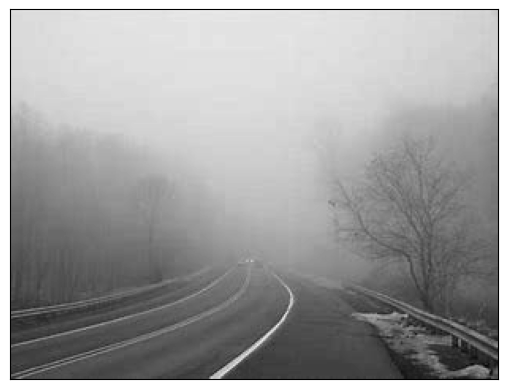

AttributeError: module 'cv2' has no attribute 'caIcHist'

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt 
img=cv.imread('mistyroad.jpg') 

gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray'), plt.xticks([]), plt.yticks([]), plt.show() 

h=cv.calcHist([gray],[0],None,[256],[0,256])
plt.plot(h,color='r' ,linewidth=1), plt.show() 

equal=cv.equalizeHist(gray)
plt.imshow(equal,cmap='gray'), plt.xticks([]), plt.yticks([]), plt.show()

h=cv.calCHist([equal],[0],None,[256],[0,256]) 
plt.plot(h,color='r' ,linewidth=1),plt.show()

## 예지연산자

In [6]:
import cv2 as cv

img=cv.imread('soccer.jpg')
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

grad_x=cv.Sobel(gray,cv.CV_32F,1,0,ksize=3)
grad_y=cv.Sobel(gray,cv.CV_32F,0,1,ksixe=3)

sobel_x=cv.convertScaleAbs(grad_x)
sobel_y=cv.convertScaleAbs(grad_y)

edge_strength=cv.addWeighted(sobel_x,0.5,sobel_y,0,5,0)

cv.imshow('Original',gray)
cv.imshow('sobelx',sobel_x)
cv.imshow('sobely',sobel_y)
cv.imshow('edge strength',edge_strength)

cv.waitKey()
cv.destroyAllWinodows()

error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'Sobel'
> Overload resolution failed:
>  - 'ksixe' is an invalid keyword argument for Sobel()
>  - 'ksixe' is an invalid keyword argument for Sobel()


## 허프 변환을 이용해 사과 검출하기

In [9]:
import cv2 as cv

img=cv.imread('apples.jpg')
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

apples=cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,200,param1=150,param2=20,
                      minRadius=50,maxRadius=120)

for i in apples[0]:
  cv.circle(img,(int(i[0]),int(i[1])),int(i[2]),(255,0,0),2)
    
cv.imshow('Apple detection',img)
    
cv.waitKey()
cv.destroyAllWindows()

## 정규화 절단 알고리즘으로 영역 분할하기

In [13]:
import skimage
import numpy as np
import cv2 as cv
import time

coffee-skimage.data.coffee()

start=time.time()
slic=skimage.segmentation.slic(coffee,compactness=20,n_segments=600,start_label=1)

g=skimage.future.graph.rag_mean_color(coffee,slic,mode='similarity')
ncut=skimage.future.graph.cut_normalized(slic,g)
print(coffee.shape,'Coffee 영상을 분할하는데',time.time()-start,'초 소요')

marking=skimage.segmentation.mark_boundaries(coffee,ncut)
ncut_coffee=np.uint8(marking*255.0)

cv.imshow('Normalized cut',cv.cvtColor(ncut_coffee,cv.COLOR_RGB2BGR))

cv.waitKey()
cv.destroyAllWindows()

ModuleNotFoundError: No module named 'skimage'

## SIFT 검출과 기술자 추출

In [14]:
import cv2 as cv

img=cv.imread('mot_color70.jpg')
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

sift=cv.SIFT_create()
kp,des=sift.detectAndCompute(gray,None)

gray=cv.drawKeypoints(gray,kp,None,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imshow('sift',gray)

k=cv.waitKey()
cv.destroyAllWindows()